In [3]:

import time
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN

In [29]:
filenames = {
    "wisconsin_ssd_merged": "./ds/v3/selected_cols_merged/wisconsin-220g2-10Gbps_ssd_merged_V3.csv",
    # "wisconsin_ssd_unmerged": "./ds/v3/selected_cols/wisconsin-220g2-10Gbps_ssd_unmerged_V3.csv",

    "wisconsin_hdd_merged": "./ds/v3/selected_cols_merged/wisconsin-220g2-10Gbps_hdd_merged_V3.csv",
    # "wisconsin_hdd_unmerged": "./ds/v3/selected_cols/wisconsin-220g2-10Gbps_hdd_unmerged_V3.csv",

    "wisconsin_hdd_ssd_merged": "./ds/v3/selected_cols_merged/wisconsin-220g2-hdd-ssd_merged_V3.csv",
    # "wisconsin_hdd_ssd_unmerged": "./ds/v3/selected_cols/wisconsin-220g2-hdd-ssd_unmerged_V3.csv",

    "wisconsin_ssd_delay_10ms_merged":"./ds/v3/selected_cols_merged/wisconsin-220g2-ssd-delayed-10ms_merged_V3.csv",
    # "wisconsin_ssd_delayed_10ms_unmerged":"./ds/v3/selected_cols_merged/wisconsin-220g2-ssd-delayed-10ms_unmerged_V3.csv"

    "wisconsin_hdd_delay_10ms_merged":"./ds/v3/selected_cols_merged/wisconsin-220g2-hdd-delayed-10ms_merged_V3.csv",
    # # "wisconsin_hdd_delay_10ms_unmerged":"./ds/v3/selected_cols/wisconsin-220g2-hdd-delayed-10ms_unmerged_V3.csv",

    "utah_ssd_merged": "./ds/v3/selected_cols_merged/utah-6525-25g-25Gbps_ssd_merged.csv",
    # "utah_ssd_unmerged": "./ds/v3/selected_cols/utah-6525-25g-25Gbps_ssd_unmerged_V3.csv",

    "utah_ssd_delay_30ms_merged":"./ds/v3/selected_cols_merged/utah-6525-25-ssd-delayed-30ms_merged_V3.csv",
    # "utah_ssd_delay_unmerged": "./ds/v3/selected_cols/utah-6525-25-ssd-delayed-30ms_unmerged_V3.csv",


    "utah_ssd_delay_10ms_merged":"./ds/v3/selected_cols_merged/utah-6525-25-ssd-delayed-10ms_merged_V3.csv",
    # # "utah_ssd_delay_10ms_merged": "./ds/v3/selected_cols/utah-6525-25-ssd-delayed-10ms_unmerged_V3.csv",

}
data = {}


In [13]:
def remove_labels_in_df(df, labels_values):
    for lbl in labels_values:
        df = df.drop(df[df.label_value == lbl].index)
    return df

In [32]:
def model_factory(model_name):
    if model_name == "RandomForest":
        return RandomForestClassifier(n_estimators=100)
    elif model_name == "DecisionTreeClassifier":
        return DecisionTreeClassifier()
    elif model_name == "SVM":
        return  svm.SVC()
    elif model_name == "MLPNeuralNetwork":
        return MLPClassifier()
    elif model_name == "XGB":
        return XGBClassifier()
    else:
        return RandomForestClassifier(n_estimators=100)

In [10]:
# emulab_hdd_merged = pd.read_csv(filenames.get('emulab_hdd_merged')).drop(['time_stamp'], axis=1)

wisconsin_ssd_merged = pd.read_csv(filenames.get('wisconsin_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
# wisconsin_ssd_unmerged = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)

utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
# utah_ssd_unmerged = pd.read_csv(filenames.get('utah_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)

wisconsin_hdd_merged = pd.read_csv(filenames.get('wisconsin_hdd_merged')).drop(['time_stamp', 'through_put'], axis=1)
# wisconsin_hdd_unmerged = pd.read_csv(filenames.get('wisconsin_hdd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)

# utah_ssd_delay_merged = pd.read_csv(filenames.get('utah_ssd_delay_merged')).drop(['time_stamp', 'through_put'], axis=1)
# utah_ssd_delay_unmerged = pd.read_csv(filenames.get('utah_ssd_delay_unmerged')).drop(['time_stamp', 'through_put'], axis=1)

In [11]:
wisconsin_ssd_merged.shape

(8402, 145)

In [274]:
# df

# df = utah_ssd_merged
df = wisconsin_ssd_merged
len(dict(Counter(df[df.columns[len(df.columns) - 1]])))

13

In [72]:
df = wisconsin_ssd_merged
df = remove_labels_in_df(df, [17, 21, 25, 29])
y = df.label_value
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
# X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# print(metrics.confusion_matrix(y_test, y_pred))
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

features = []
for i in range(len(score)):
    if score[i] >= 0.03:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))

(4223, 144)
(1188, 144)
100.0
Cummulative Importance Score: 
 [0.08 0.15 0.2  0.25 0.29 0.33 0.37 0.41 0.44 0.47 0.5  0.53 0.56 0.58
 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96]
Counter({0.0: 103, 0.01: 16, 0.02: 12, 0.03: 5, 0.04: 4, 0.05: 2, 0.08: 1, 0.07: 1})
['sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_n

In [15]:
features_imp = {}
for i in range(len(score)):
    if score[i] >= 0.02:
        # features.append(X.columns[i])
        # print(df.columns[i])
        features_imp[X.columns[i]] = score[i]
print(features_imp)
print(len(features_imp))



{'sender_avg_rtt_value': 0.02, 'sender_cwnd_rate': 0.04, 'sender_retrans': 0.03, 'sender_segs_in': 0.04, 'sender_avg_send_value': 0.02, 'sender_send_buffer_value': 0.02, 'sender_tcp_snd_buffer_max': 0.04, 'sender_avg_waittime_md': 0.08, 'sender_nic_send_bytes': 0.04, 'sender_nic_receive_bytes': 0.05, 'sender_remote_ost_read_bytes': 0.02, 'receiver_avg_retransmission_timeout_value': 0.02, 'receiver_seg_out': 0.04, 'receiver_read_bytes_io': 0.03, 'receiver_tcp_rcv_buffer_max': 0.04, 'receiver_req_waittime': 0.02, 'receiver_req_active': 0.02, 'receiver_write_bytes': 0.02, 'receiver_ost_write': 0.02, 'receiver_avg_waittime_md': 0.07, 'receiver_system_cpu_percent': 0.02, 'receiver_nic_send_bytes': 0.04, 'receiver_nic_receive_bytes': 0.06, 'receiver_remote_ost_write_bytes': 0.02}
24


In [570]:
# print(sorted(features_imp))
# for k in sorted(features_imp):
#     print(k, features_imp[k])
#
print(dict(sorted(features_imp.items(), key=lambda item: item[1], reverse=True)))

{'sender_avg_waittime_md': 0.09, 'receiver_avg_waittime_md': 0.08, 'receiver_nic_receive_bytes': 0.05, 'sender_retrans': 0.04, 'sender_segs_in': 0.04, 'receiver_seg_out': 0.04, 'receiver_nic_send_bytes': 0.04, 'sender_avg_rtt_value': 0.03, 'sender_cwnd_rate': 0.03, 'sender_tcp_snd_buffer_max': 0.03, 'sender_nic_send_bytes': 0.03, 'sender_nic_receive_bytes': 0.03, 'receiver_segs_in': 0.03, 'receiver_tcp_rcv_buffer_max': 0.03, 'sender_ssthresh_value': 0.02, 'sender_avg_send_value': 0.02, 'sender_send_buffer_value': 0.02, 'receiver_avg_retransmission_timeout_value': 0.02, 'receiver_read_bytes_io': 0.02, 'receiver_req_waittime': 0.02, 'receiver_req_active': 0.02, 'receiver_ost_write': 0.02, 'receiver_system_cpu_percent': 0.02, 'receiver_remote_ost_write_bytes': 0.02}


In [253]:
# features = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes']

#
# features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_send_buffer_value', 'sender_cpu_usage_percentage', 'sender_tcp_snd_buffer_max', 'sender_ost_read', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes']


# features =  ['sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'receiver_seg_out', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes']

features =  ['sender_avg_rtt_value', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'receiver_seg_out', 'receiver_tcp_rcv_buffer_max', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']


In [74]:
y_new = df.label_value
X_new = df[features] #.drop(columns="label_value")

df = remove_labels_in_df(df, [17, 21, 25, 29])
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
# X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

print(X_train.shape)
clf_new = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print(np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2))

score = np.round(clf_new.feature_importances_, 2)

# # print(sorted(list(score), reverse=True))
# print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
# print(Counter(score))


# features_imp = {}
# for i in range(len(score)):
#         # features.append(X.columns[i])
#         # print(df.columns[i])
#     features_imp[X_train.columns[i]] = score[i]
# print(features_imp)
#
# print(len(features_imp))
# # features_imp = {}
# print(dict(sorted(features_imp.items(), key=lambda item: item[1], reverse=True)))

(4223, 13)
(1233, 13)
100.0


In [34]:
def update_labels_xgboost(df):
    # updated_labels = {0:0, 1:1, 4:2, 7:3, 10:4, 13:5,
    #                   17:6, 21:7, 25:8, 29:9,
    #                  33:10, 37:11, 43:12}
    updated_labels = {0:0, 1:1, 4:2, 7:3, 10:4, 13:5, 33:6, 37:7, 43:8}
    y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

## TEST WITH DIFFERENT CLASSIFIRES MEREGD LEVELS - 13 labels

In [254]:
# datasets = ['wisconsin_ssd_merged', 'utah_ssd_merged', 'wisconsin_hdd_merged', 'utah_ssd_delay_merged']
datasets = filenames.keys()
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 3
training_time = {}
remove_labels = [17, 21, 25, 29]
import time
for clf_key in classifiers:
    accuracies = np.zeros(len(datasets))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            df = remove_labels_in_df(df, remove_labels)
            if clf_key == "XGB":
                df = update_labels_xgboost(df)
            y = df.label_value
            X = df.drop(columns="label_value")[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            # clf = classifiers[clf_key]
            clf = model_factory(clf_key)
            clf = make_pipeline(StandardScaler(), clf)
            time_1 = time.time()
            clf.fit(X_train, y_train)
            time_2 = time.time()
            if training_time.get(clf_key):
                training_time.get(clf_key).append(time_2-time_1)
            else:
                training_time[clf_key] = [time_2-time_1]
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(accuracy)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = list(accuracies)

print(classifiers_legends)
print(datasets)
print(all_accuracies)
print(training_time)

run RandomForest model for dataset: wisconsin_ssd_merged
100.0
run RandomForest model for dataset: wisconsin_hdd_merged
99.67
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
99.72
run RandomForest model for dataset: wisconsin_ssd_delay_10ms_merged
99.72
run RandomForest model for dataset: wisconsin_hdd_delay_10ms_merged
99.72
run RandomForest model for dataset: utah_ssd_merged
100.0
run RandomForest model for dataset: utah_ssd_delay_30ms_merged
99.66
run RandomForest model for dataset: utah_ssd_delay_10ms_merged
99.93
run RandomForest model for dataset: wisconsin_ssd_merged
100.0
run RandomForest model for dataset: wisconsin_hdd_merged
99.67
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
99.61
run RandomForest model for dataset: wisconsin_ssd_delay_10ms_merged
99.93
run RandomForest model for dataset: wisconsin_hdd_delay_10ms_merged
99.72
run RandomForest model for dataset: utah_ssd_merged
99.93
run RandomForest model for dataset: utah_ssd_delay_30ms_merged
9

In [25]:
_13_labels_accs = all_accuracies
# {'RandomForest': array([95.614, 98.944, 97.074, 98.776, 97.536]), 'DecisionTreeClassifier': array([93.648, 97.23 , 94.22 , 98.36 , 96.126]), 'SVM': array([85.86 , 94.902, 93.404, 90.852, 94.856]), 'MLPNeuralNetwork': array([91.064, 97.82 , 95.668, 95.564, 97.388]), 'XGB': array([98.344, 98.768, 97.522, 99.07 , 98.042])}
# all_accuracies = {'RandomForest': np.array([95.68, 99.12, 97.39, 98.81, 96.98]), 'DecisionTreeClassifier': np.array([93.38, 97.37, 94.46, 97.6 , 95.75]), 'SVM': np.array([85.89, 95.33, 93.42, 90.31, 94.56]), 'MLPNeuralNetwork': np.array([91.45, 98.17, 95.62, 95.07, 97.75]), 'XGB': np.array([97.92, 98.83, 97.64, 99.33, 97.79])}

In [255]:
# np.average([95.68, 99.12, 97.39, 98.81, 96.98])
# np.average([97.92, 98.83, 97.64, 99.33, 97.79])
# print(np.average([0.7868380546569824, 0.417910099029541, 0.35545897483825684, 0.34842419624328613, 0.354356050491333]))
# print(np.average([2.951751232147217, 1.601038932800293, 1.7936930656433105, 1.8401007652282715, 1.371891975402832]))
# accs = {'RandomForest': np.array([98.38666667, 99.80333333, 99.63666667, 99.86      , 99.09      ]), 'DecisionTreeClassifier': np.array([97.43      , 99.26      , 97.97666667, 99.88      , 98.04      ]), 'SVM': np.array([94.1       , 99.13      , 97.86333333, 99.52      , 97.58333333]), 'MLPNeuralNetwork': np.array([98.23666667, 99.70333333, 99.34      , 99.68333333, 99.08333333]), 'XGB': np.array([99.67333333, 99.77333333, 99.72      , 99.90666667, 99.26333333])}
#
# accs = {'RandomForest': np.array([100.        ,  99.94666667, 100.        ,  99.97666667,
#         99.68666667, 100.        ,  99.97666667,  99.97666667]), 'DecisionTreeClassifier': np.array([ 99.90666667,  99.56      , 100.        ,  99.57333333,
#         99.48333333,  99.95333333,  99.95333333,  99.93      ]), 'SVM': np.array([99.86      , 99.76      , 99.83333333, 99.67333333, 99.74333333,
#        99.88333333, 99.86333333, 99.95333333]), 'MLPNeuralNetwork': np.array([ 99.93      ,  99.70666667,  99.87      ,  99.79      ,
#         99.8       ,  99.95333333, 100.        ,  99.90666667]), 'XGB': np.array([100.        ,  99.92333333, 100.        ,  99.88333333,
#         99.87      ,  99.97666667,  99.95333333,  99.83666667])}

# accs = {'RandomForest': [99.97666666666667, 99.72333333333334, 99.78000000000002, 99.76666666666667, 99.64999999999999, 99.88333333333333, 99.59333333333335, 99.81333333333335], 'DecisionTreeClassifier': [99.76333333333332, 99.44333333333333, 99.48, 99.27333333333333, 99.52, 99.76666666666667, 99.38666666666666, 99.62666666666667], 'SVM': [99.65000000000002, 99.59333333333332, 99.34666666666665, 99.14999999999999, 99.36666666666667, 99.88333333333334, 98.65333333333335, 99.46666666666665], 'MLPNeuralNetwork': [99.90666666666668, 99.56, 99.45, 99.64666666666666, 99.61333333333334, 99.79, 99.41666666666667, 99.81333333333333], 'XGB': [99.93, 99.74, 99.74, 99.58, 99.70666666666666, 99.83666666666666, 99.52, 99.93]}
accs = {'RandomForest': [100.0, 99.69, 99.70333333333333, 99.67, 99.71999999999998, 99.85666666666667, 99.57, 99.90666666666668], 'DecisionTreeClassifier': [99.83666666666666, 99.52, 99.28666666666668, 99.38333333333333, 99.3, 99.74333333333334, 99.38666666666666, 99.69666666666667], 'SVM': [99.76333333333334, 99.18333333333334, 99.41333333333334, 99.41333333333334, 99.17666666666666, 99.88333333333334, 98.99, 99.49], 'MLPNeuralNetwork': [99.93, 99.59666666666668, 99.58, 99.60000000000001, 99.64999999999999, 99.86000000000001, 99.33999999999999, 99.67333333333333], 'XGB': [99.95333333333333, 99.60000000000001, 99.50333333333333, 99.71999999999998, 99.77666666666666, 99.97666666666667, 99.77333333333333, 99.83666666666666]}
for key in accs.keys():
    s = ""
    for acc in list(np.round(accs[key], 2)):
        s += " {} &".format(acc)
        # s += acc + " &"
    # print(key,np.round(accs[key], 2))
    print(key,s, np.average(np.round(accs[key], 2)))

RandomForest  100.0 & 99.69 & 99.7 & 99.67 & 99.72 & 99.86 & 99.57 & 99.91 & 99.76499999999999
DecisionTreeClassifier  99.84 & 99.52 & 99.29 & 99.38 & 99.3 & 99.74 & 99.39 & 99.7 & 99.52000000000001
SVM  99.76 & 99.18 & 99.41 & 99.41 & 99.18 & 99.88 & 98.99 & 99.49 & 99.4125
MLPNeuralNetwork  99.93 & 99.6 & 99.58 & 99.6 & 99.65 & 99.86 & 99.34 & 99.67 & 99.65375
XGB  99.95 & 99.6 & 99.5 & 99.72 & 99.78 & 99.98 & 99.77 & 99.84 & 99.7675


## TEST WITH DIFFERENT CLASSIFIRES UNMERGED LEVELS - 49 labels

In [281]:
# df = pd.read_csv(filenames.get('emulab_hdd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
df = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
print(df.shape)
print(len(dict(Counter(df[df.columns[len(df.columns) - 1]]))))

(8402, 145)
49


In [283]:
y = df.label_value
# X = df.drop(columns="label_value")[features_2] # df[features]
# X = df.drop(columns="label_value")[features] # df[features]
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
# X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
# features_2 = []
# for i in range(len(score)):
#     if score[i] >= 0.02:
#         features_2.append(X.columns[i])
#         # print(df.columns[i])
# print(features_2)
# print(len(features_2))

(4557, 144)
99.14
Cummulative Importance Score: 
 [0.06 0.1  0.14 0.18 0.22 0.25 0.28 0.31 0.34 0.37 0.4  0.43 0.45 0.47
 0.49 0.51 0.53 0.55 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75
 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9
 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99
 0.99 0.99 0.99 0.99]
Counter({0.0: 93, 0.01: 22, 0.02: 17, 0.03: 7, 0.04: 4, 0.06: 1})


In [284]:
features_2 = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features_2.append(X.columns[i])
        # print(df.columns[i])
print(features_2)
print(len(features_2))

['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_send_buffer_value', 'sender_rss', 'sender_mem_usage_percentage', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'sender_dtn_lustre_read_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes', 'receiver_dtn_lustre_write_bytes']
29


In [285]:
# features_2 =['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_seg_out', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']
# features_2 = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_req_waittime', 'sender_req_active', 'sender_ost_read', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_read_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_write_bytes']

features_2 = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_send_buffer_value', 'sender_rss', 'sender_mem_usage_percentage', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'sender_dtn_lustre_read_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes', 'receiver_dtn_lustre_write_bytes']


In [286]:
def update_labels_xgboost_161_labels(df):
    #[ 91, 100, 46]
    updated_labels = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46:46, 47:47, 48:48}
    y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [288]:
datasets = ['wisconsin_ssd_unmerged', 'utah_ssd_unmerged', 'wisconsin_hdd_unmerged', 'utah_ssd_delay_unmerged']
# datasets = ['utah_ssd_unmerged_1g']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 1
for clf_key in classifiers:
    accuracies = np.zeros(len(datasets))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            if clf_key == "XGB":
                df = update_labels_xgboost_161_labels(df)
            y = df.label_value
            X = df.drop(columns="label_value")[features_2]#[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            # clf = classifiers[clf_key]
            clf = model_factory(clf_key)
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(accuracy)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)

run RandomForest model for dataset: wisconsin_ssd_unmerged
98.39
run RandomForest model for dataset: utah_ssd_unmerged
98.28
run RandomForest model for dataset: wisconsin_hdd_unmerged
98.84
run RandomForest model for dataset: utah_ssd_delay_unmerged
98.35


run DecisionTreeClassifier model for dataset: wisconsin_ssd_unmerged
97.8
run DecisionTreeClassifier model for dataset: utah_ssd_unmerged
97.34
run DecisionTreeClassifier model for dataset: wisconsin_hdd_unmerged
98.03
run DecisionTreeClassifier model for dataset: utah_ssd_delay_unmerged
97.71


run SVM model for dataset: wisconsin_ssd_unmerged
90.96
run SVM model for dataset: utah_ssd_unmerged
90.26
run SVM model for dataset: wisconsin_hdd_unmerged
87.35
run SVM model for dataset: utah_ssd_delay_unmerged
80.62


run MLPNeuralNetwork model for dataset: wisconsin_ssd_unmerged
96.76
run MLPNeuralNetwork model for dataset: utah_ssd_unmerged
97.2
run MLPNeuralNetwork model for dataset: wisconsin_hdd_unmerged
96.49
run MLPNeuralNetwork m

In [30]:
_49_labels_accs = all_accuracies

# all_accuracies = {'RandomForest': np.array([95.844, 94.296, 92.704, 96.604, 93.946]), 'DecisionTreeClassifier': np.array([85.112, 86.942, 78.36 , 91.38 , 81.472]), 'SVM': np.array([85.55 , 76.662, 70.888, 70.622, 73.66 ]), 'MLPNeuralNetwork': np.array([94.842, 89.602, 88.69 , 88.97 , 92.44 ]), 'XGB': np.array([94.798, 92.164, 90.5  , 95.022, 91.802])}

#with over sampling
# {'RandomForest': np.array([95.07, 94.94, 93.06, 97.32, 94.3 ]), 'DecisionTreeClassifier': np.array([85.41, 89.98, 82.11, 93.27, 84.59]), 'SVM': np.array([84.9 , 82.67, 72.54, 80.11, 74.87]), 'MLPNeuralNetwork': np.array([95.88, 92.7 , 92.77, 94.61, 94.97]), 'XGB': np.array([94.62, 92.07, 90.77, 94.31, 92.17])}

for key in accs.keys():
    print(key, np.round(accs[key], 2))

RandomForest [94.81 94.56 93.1  96.61 93.55]
DecisionTreeClassifier [86.49 90.99 84.12 94.25 85.81]
SVM [86.66 83.91 76.74 78.77 77.97]
MLPNeuralNetwork [96.45 93.56 93.74 93.91 95.47]
XGB [94.86 93.1  92.39 94.8  92.58]


In [ ]:
# np.mean([95.844, 94.296, 92.704, 96.604, 93.946])
# np.mean([94.798, 92.164, 90.5  , 95.022, 91.802])
# f = {'RandomForest': np.array([95.07, 94.94, 93.06, 97.32, 94.3 ]), 'DecisionTreeClassifier': np.array([85.41, 89.98, 82.11, 93.27, 84.59]), 'SVM': np.array([84.9 , 82.67, 72.54, 80.11, 74.87]), 'MLPNeuralNetwork': np.array([95.88, 92.7 , 92.77, 94.61, 94.97]), 'XGB': np.array([94.62, 92.07, 90.77, 94.31, 92.17])}

## TEST WITH DIFFERENT CLASSIFIRES UNMERGED LEVELS - 5 labels


In [514]:
def group_to_5_cate_version2(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # group read  and read_link together
    for i in range(1, 4):
        aggregated_labels.update({i: 1})
    for i in range(7, 10):
        aggregated_labels.update({i: 1})

    # group write and write_link together
    for i in range(4, 7):
        aggregated_labels.update({i: 4})
    for i in range(10, 13):
        aggregated_labels.update({i: 4})
    # group networks together
    for i in range(13, 37):
        aggregated_labels.update({i: 13})
    # group tcp configs together
    for i in range(37, 49):
        aggregated_labels.update({i: 37})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

def update_labels_xgboost_5cat(df):
    updated_labels = {0:0, 1:1, 4:2, 13:3, 37:4}
    y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df


In [217]:
df = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
df.shape
# df = grouped_to_5_cat(df, 161)
df = group_to_5_cate_version2(df, 49)
print(df.shape)
print(len(dict(Counter(df[df.columns[len(df.columns) - 1]]))))

y = df.label_value
# X = df.drop(columns="label_value")[features_3] # df[features]
# X = df.drop(columns="label_value")[features] # df[features]
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

features_3 = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features_3.append(X.columns[i])
#         # print(df.columns[i])
print(features_3)
# print(len(features_3))

(8402, 145)
5
(15625, 144)
100.0
Cummulative Importance Score: 
 [0.1  0.19 0.26 0.32 0.36 0.4  0.44 0.47 0.5  0.53 0.56 0.59 0.61 0.63
 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.8  0.81 0.82 0.83 0.84 0.85
 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97
 0.97 0.97 0.97 0.97]
Counter({0.0: 104, 0.01: 18, 0.02: 10, 0.03: 5, 0.04: 3, 0.07: 1, 0.09: 1, 0.06: 1, 0.1: 1})
['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_segs_in', 'sender_unacked_value', 'sen

In [ ]:
# features_3 = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_vsize', 'receiver_cpu_usage_percentage', 'receiver_write_bytes', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features_3 = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_req_active', 'receiver_write_bytes', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features_3 = ['sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_tcp_rcv_buffer_min', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent']

features_3 = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_ost_read', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_remote_ost_write_bytes']

In [224]:
datasets = ['wisconsin_ssd_unmerged', ] # 'utah_ssd_unmerged'
# datasets = ['emulab_hdd_merged', 'utah_ssd_merged', 'wisconsin_ssd_merged', 'utah_ssd_merged_1g', 'wisconsin_hdd_ssd_merged']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 3
for clf_key in classifiers:
    accuracies = np.zeros(len(classifiers_legends))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            # df = grouped_to_5_cat(df, 161)
            # if clf_key == "XGB":
            #     df = update_labels_xgboost_5cat(df)
            df = group_to_5_cate_version2(df, 49)
            y = df.label_value
            X = df.drop(columns="label_value")[features_3]#[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            # clf = classifiers[clf_key]
            clf = model_factory(clf_key)
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(accuracy)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)

run RandomForest model for dataset: wisconsin_ssd_unmerged
100.0
run RandomForest model for dataset: wisconsin_ssd_unmerged
100.0
run RandomForest model for dataset: wisconsin_ssd_unmerged
100.0


run DecisionTreeClassifier model for dataset: wisconsin_ssd_unmerged
99.86
run DecisionTreeClassifier model for dataset: wisconsin_ssd_unmerged
99.71
run DecisionTreeClassifier model for dataset: wisconsin_ssd_unmerged
99.9


run SVM model for dataset: wisconsin_ssd_unmerged
99.95
run SVM model for dataset: wisconsin_ssd_unmerged
100.0
run SVM model for dataset: wisconsin_ssd_unmerged
99.95


run MLPNeuralNetwork model for dataset: wisconsin_ssd_unmerged
100.0
run MLPNeuralNetwork model for dataset: wisconsin_ssd_unmerged
99.95
run MLPNeuralNetwork model for dataset: wisconsin_ssd_unmerged
99.95


run XGB model for dataset: wisconsin_ssd_unmerged
100.0
run XGB model for dataset: wisconsin_ssd_unmerged
100.0
run XGB model for dataset: wisconsin_ssd_unmerged
100.0


['RandomForest', 'DecisionTr

## Overhead analysis

## Transfer Learning 13 labels


In [238]:
filenames_merged = {
    "wisconsin_ssd_merged": "./ds/v3/selected_cols_merged/wisconsin-220g2-10Gbps_ssd_merged_V3.csv",
    # "wisconsin_ssd_unmerged": "./ds/v3/selected_cols/wisconsin-220g2-10Gbps_ssd_unmerged_V3.csv",

    "wisconsin_hdd_merged": "./ds/v3/selected_cols_merged/wisconsin-220g2-10Gbps_hdd_merged_V3.csv",
    # "wisconsin_hdd_unmerged": "./ds/v3/selected_cols/wisconsin-220g2-10Gbps_hdd_unmerged_V3.csv",

    "wisconsin_hdd_ssd_merged": "./ds/v3/selected_cols_merged/wisconsin-220g2-hdd-ssd_merged_V3.csv",
    # "wisconsin_hdd_ssd_unmerged": "./ds/v3/selected_cols/wisconsin-220g2-hdd-ssd_unmerged_V3.csv",

    "wisconsin_ssd_delay_10ms_merged":"./ds/v3/selected_cols_merged/wisconsin-220g2-ssd-delayed-10ms_merged_V3.csv",
    # "wisconsin_ssd_delayed_10ms_unmerged":"./ds/v3/selected_cols_merged/wisconsin-220g2-ssd-delayed-10ms_unmerged_V3.csv"

    "wisconsin_hdd_delay_10ms_merged":"./ds/v3/selected_cols_merged/wisconsin-220g2-hdd-delayed-10ms_merged_V3.csv",
    # # "wisconsin_hdd_delay_10ms_unmerged":"./ds/v3/selected_cols/wisconsin-220g2-hdd-delayed-10ms_unmerged_V3.csv",

    "utah_ssd_merged": "./ds/v3/selected_cols_merged/utah-6525-25g-25Gbps_ssd_merged.csv",
    # "utah_ssd_unmerged": "./ds/v3/selected_cols/utah-6525-25g-25Gbps_ssd_unmerged_V3.csv",

    "utah_ssd_delay_30ms_merged":"./ds/v3/selected_cols_merged/utah-6525-25-ssd-delayed-30ms_merged_V3.csv",
    # "utah_ssd_delay_unmerged": "./ds/v3/selected_cols/utah-6525-25-ssd-delayed-30ms_unmerged_V3.csv",


    "utah_ssd_delay_10ms_merged":"./ds/v3/selected_cols_merged/utah-6525-25-ssd-delayed-10ms_merged_V3.csv",
    # # "utah_ssd_delay_10ms_merged": "./ds/v3/selected_cols/utah-6525-25-ssd-delayed-10ms_unmerged_V3.csv",

}
data = {}

In [240]:


def read_file(transform=False):
    global data, filenames_merged

    for key in filenames_merged:
        df = pd.read_csv(filenames_merged[key])
        df = df.sort_values(by=['label_value']).reset_index().drop(['index','time_stamp',], axis=1)
        df.fillna(df.groupby(['label_value'], as_index=False).mean(), inplace=True)

        if transform:
            for index, row in features.iterrows():
                df[row['feature']] = df[row['feature']] / df[row['normalizer']]

        df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
        data[key] = df

read_file()

In [846]:
GB = 1024 * 1024 * 1024

In [ ]:
feature_list = features
for key in data:
    df = data[key].copy()
    y = df.label_value
    X = df#[feature_list]
    clf = make_pipeline(StandardScaler(),  RandomForestClassifier(n_estimators=100)) #RandomForestClassifier(n_estimators=100)
    cv_res = np.round(cross_val_score(clf, X, y, cv=10, scoring="f1_weighted"),4)
    print(f'{key} ==>{cv_res}')
    print(f'{key} ==> mean: {np.round(np.mean(cv_res)*100, 2)}, std: {np.round(np.std(cv_res)*100, 2)}')

In [ ]:
def change_labels_5(y, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y_new = np.array([aggregated_labels[int(i)] for i in y])
    return y_new

def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [ ]:
def group_to_5_cate_version2(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    normal_labels = [0]
    for i in normal_labels:
        aggregated_labels.update({i: 0})
    sender_io_labels = [1, 10, 37, 55, 64, 91]
    for i in sender_io_labels:
        aggregated_labels.update({i: 1})
    receiver_io_labels = [19, 28, 46, 73, 82, 100]
    for i in receiver_io_labels:
        aggregated_labels.update({i: 2})
    network_labels = [109, 113, 117, 129, 133, 157]
    for i in network_labels:
        aggregated_labels.update({i: 3})
    buffer_value_labels = [145, 151]
    for i in buffer_value_labels:
        aggregated_labels.update({i: 4})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [220]:
def draw_heat_map(data, ticks, average_score):
    sns.set(rc={'figure.figsize':(12,6), 'font.size': 25})
    print(average_score)
    mask = np.zeros(data.shape)
    np.fill_diagonal(data, np.nan)

    ax = sns.heatmap(data, annot=True,  vmin=50, vmax=90,linewidths=.5,cmap="RdBu", linecolor='k', fmt='.0f',mask=mask)

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=33)
    cbar.ax.set_title("F-Score", fontsize=33, y=1.05, loc="left")

    ax.set_xlabel('Test dataset', fontsize= 33)
    ax.set_ylabel('Train dataset', fontsize= 33)
    ax.set_xticklabels(ticks, rotation=0, fontsize= 33, ha='center')
    ax.set_yticklabels(ticks, rotation=0, fontsize= 33)

In [241]:

#19 features
# feature_list = ['sender_seg_out', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#14features
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_tcp_snd_buffer_max', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#18 features
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes']
#
#
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'receiver_segs_in',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
#                 #'sender_segs_in',
#                 'sender_retrans', 'sender_cwnd_rate',
#                 'receiver_tcp_rcv_buffer_max',
#                 #------------
#                 #'sender_tcp_snd_buffer_max',
#                 #'sender_tcp_snd_buffer_min',
#                 'receiver_read_bytes_io',
#                 'receiver_ost_read',
#
#                 'sender_write_bytes',
#                 'receiver_read_bytes',
#                 ]

# feature_list = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_segs_in', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes_io',  'receiver_read_bytes_io', 'receiver_write_bytes_io'] #'sender_write_bytes_io', 'sender_read_bytes_io',  'receiver_read_bytes_io', 'receiver_write_bytes_io'

# feature_list =  ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_tcp_rcv_buffer_max', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes']

#--------------------------------------------------------------------------------------------------------
# feature_list =  ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_max', 'sender_ost_read', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes']

# feature_list =  ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_seg_out', 'receiver_tcp_rcv_buffer_max', 'receiver_write_bytes', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes']

# feature_list =  ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'receiver_seg_out', 'receiver_tcp_rcv_buffer_max', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']


feature_list =  ['sender_avg_rtt_value', 'sender_retrans', 'sender_segs_in', 'sender_tcp_snd_buffer_max', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'receiver_seg_out', 'receiver_tcp_rcv_buffer_max', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

In [242]:
def normalize_df(df):
    df['sender_avg_rtt_value'] = df['sender_avg_rtt_value'] / df[df.label_value == 0].sender_avg_rtt_value.mean()
    df['sender_retrans'] = df['sender_retrans'] / df[df.label_value == 0].sender_seg_out.mean()
    # df["sender_avg_send_value"] = df["sender_avg_send_value"] / df[df.label_value == 0].sender_avg_send_value.mean()
    df["sender_segs_in"] = df["sender_segs_in"] / df[df.label_value == 0].sender_segs_in.mean()

    # df["sender_ost_read"] = df["sender_ost_read"] / df[df.label_value == 0].sender_ost_read.mean()

    df["sender_nic_send_bytes"] = df["sender_nic_send_bytes"] / df[df.label_value == 0].sender_nic_send_bytes.mean()
    df["sender_nic_receive_bytes"] = df["sender_nic_receive_bytes"] / df[df.label_value == 0].sender_nic_receive_bytes.mean()

    df["sender_remote_ost_read_bytes"] =df["sender_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()

    # df["receiver_segs_in"] = df["receiver_segs_in"] / df[df.label_value == 0].receiver_segs_in.mean()
    df["receiver_seg_out"] = df["receiver_seg_out"] / df[df.label_value == 0].receiver_seg_out.mean()

    # df["receiver_write_bytes"] = df["receiver_write_bytes"] / df[df.label_value == 0].receiver_write_bytes.mean()
    # df["receiver_ost_write"] = df["receiver_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean()

    df["receiver_nic_send_bytes"] = df["receiver_nic_send_bytes"] / df[df.label_value == 0].receiver_nic_send_bytes.mean()
    df["receiver_nic_receive_bytes"] = df["receiver_nic_receive_bytes"] / df[df.label_value == 0].receiver_nic_receive_bytes.mean()

    df["receiver_remote_ost_write_bytes"] = df["receiver_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()

    df["sender_tcp_snd_buffer_max"] = df["sender_tcp_snd_buffer_max"] / df[df.label_value == 0].sender_tcp_snd_buffer_max.mean()
    df["receiver_tcp_rcv_buffer_max"] = df["receiver_tcp_rcv_buffer_max"] / df[df.label_value == 0].receiver_tcp_rcv_buffer_max.mean()

    # df["sender_write_bytes_io"] = df["sender_write_bytes_io"] / df[df.label_value == 0].sender_write_bytes_io.mean()
    # df["sender_read_bytes_io"] = df["sender_read_bytes_io"] / df[df.label_value == 0].sender_read_bytes_io.mean()
    #
    # df["receiver_read_bytes_io"] = df["receiver_read_bytes_io"] / df[df.label_value == 0].receiver_read_bytes_io.mean()
    # df["receiver_write_bytes_io"] = df["receiver_write_bytes_io"] / df[df.label_value == 0].receiver_write_bytes_io.mean()

    #---------------
    # df["sender_ssthresh_value"] = df.sender_ssthresh_value / df.sender_cwnd_rate
    # df["sender_req_active"] = df["sender_req_active"] / df[df.label_value == 0].sender_req_active.mean()
    return df

In [148]:
len(feature_list)

12

In [250]:
transfer_learning_acc = []
rounds = 3
# 19, 28, 46, 73, 82, 100
remove_labels =  [17, 21, 25, 29]
def prepare_df(df):
    df = remove_labels_in_df(df, remove_labels)
    # df = normalize_df(df)

    # df = group_to_5_cate_version2(df,161)
    # df = update_labels_xgboost_5cat(df)
    y = df.label_value
    X = df.drop(columns="label_value")[feature_list]#.drop(columns="label_value")#[feature_list] #.drop(columns="label_value")
    print()
    return X, y

# ds_names = ['wisconsin_ssd_merged', 'utah_ssd_merged', 'wisconsin_hdd_merged', 'utah_ssd_delay_merged']
ds_names = list(data.keys())

for key1 in ds_names:
    acc = np.array(np.zeros(len(ds_names)))
    for i in range(rounds):
        print("Round {}".format(i+1))
        df = data[key1].copy()
        X, y = prepare_df(df)
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
        X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
        print(X_train.shape)
        clf = RandomForestClassifier(n_estimators=100)
        # clf = XGBClassifier()
        # clf = tree.DecisionTreeClassifier(max_depth=9)
        clf.fit(X_train, y_train)
        tmp_acc = np.array([])
        for key2 in ds_names:
            # if key1 == key2:
            #     continueK
            df_test = data[key2].copy()
            X_test, y_test = prepare_df(df_test)
            y_pred = clf.predict(X_test)
            # np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
            f_score = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(f"{key1} ==> {key2} - {f_score}")
            tmp_acc = np.append(tmp_acc, f_score)
        acc = np.add(acc, tmp_acc)
    acc = acc / rounds
    transfer_learning_acc.append(acc)
    print("\n")
transfer_learning_acc = np.array(transfer_learning_acc)

diag = np.diag_indices(len(ds_names))
average_score = (np.sum(transfer_learning_acc) - np.sum(transfer_learning_acc[diag]) ) / (transfer_learning_acc.size - len(ds_names))
average_score = np.round(average_score, 2)
print(average_score)

Round 1

(7029, 12)

wisconsin_ssd_merged ==> wisconsin_ssd_merged - 99.98

wisconsin_ssd_merged ==> wisconsin_hdd_merged - 90.32

wisconsin_ssd_merged ==> wisconsin_hdd_ssd_merged - 92.5

wisconsin_ssd_merged ==> wisconsin_ssd_delay_10ms_merged - 51.36

wisconsin_ssd_merged ==> wisconsin_hdd_delay_10ms_merged - 68.87

wisconsin_ssd_merged ==> utah_ssd_merged - 93.59

wisconsin_ssd_merged ==> utah_ssd_delay_30ms_merged - 52.96

wisconsin_ssd_merged ==> utah_ssd_delay_10ms_merged - 51.38
Round 2

(7200, 12)

wisconsin_ssd_merged ==> wisconsin_ssd_merged - 100.0

wisconsin_ssd_merged ==> wisconsin_hdd_merged - 83.72

wisconsin_ssd_merged ==> wisconsin_hdd_ssd_merged - 84.25

wisconsin_ssd_merged ==> wisconsin_ssd_delay_10ms_merged - 50.79

wisconsin_ssd_merged ==> wisconsin_hdd_delay_10ms_merged - 67.7

wisconsin_ssd_merged ==> utah_ssd_merged - 93.95

wisconsin_ssd_merged ==> utah_ssd_delay_30ms_merged - 52.29

wisconsin_ssd_merged ==> utah_ssd_delay_10ms_merged - 53.33
Round 3

(7137, 

# 12 features - no normalization

In [251]:
before_norm = transfer_learning_acc.copy()
before_norm

array([[99.98666667, 88.49333333, 90.26666667, 50.78      , 68.65      ,
        93.62333333, 53.22      , 53.24666667],
       [86.06666667, 99.92666667, 94.00666667, 45.45      , 76.84      ,
        89.62333333, 52.79      , 49.95333333],
       [89.44333333, 88.04      , 99.92333333, 48.63333333, 66.42666667,
        85.21333333, 48.51333333, 44.92      ],
       [25.82      , 24.34666667, 25.81333333, 99.94666667, 69.91      ,
        15.13333333, 29.74333333, 75.24      ],
       [31.77333333, 33.46666667, 33.12666667, 85.14333333, 99.92666667,
        28.62333333, 29.76333333, 83.7       ],
       [94.48666667, 77.22666667, 87.27      , 46.        , 60.81666667,
        99.96333333, 56.41666667, 58.57666667],
       [10.32333333, 10.85      , 10.8       , 90.09      , 77.82666667,
        23.04666667, 99.92      , 94.16      ],
       [12.95      , 13.89333333, 14.41333333, 88.47666667, 64.45      ,
        26.86666667, 39.30333333, 99.94666667]])

55.61


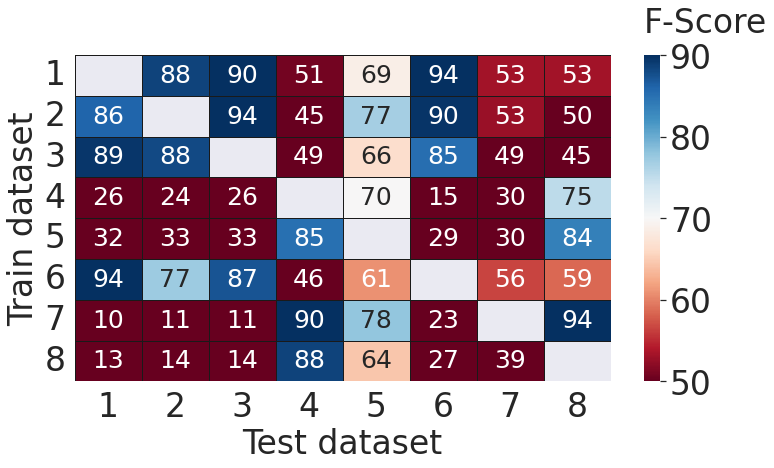

In [252]:
# ticks_labels = []
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4" , "Tb #5", "Tb #6", "Tb #7", "Tb #8"]
ticks_labels = ["1", "2", "3", "4" , "5", "6", "7", "8"]
# for i in range(len(ds_names)):
#     ticks_labels.append("{}".format(ds_names[i]))
draw_heat_map(before_norm, ticks_labels, average_score)
plt.savefig('TR_9class_without_normalization_12features_{}.pdf'.format(average_score), bbox_inches='tight')

# 12 features - normalize 11

82.26


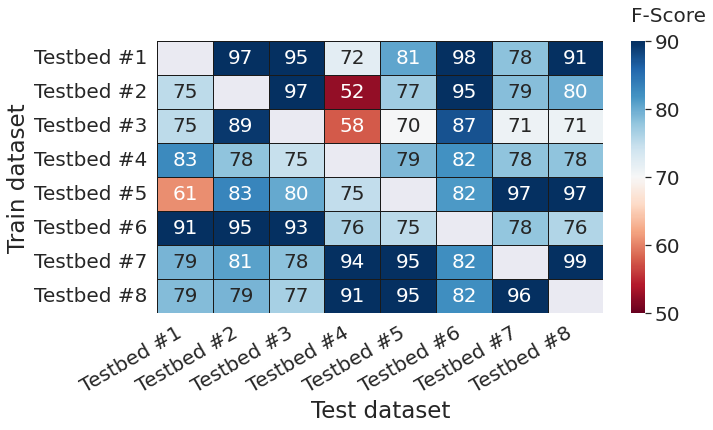

In [152]:
after_norm = transfer_learning_acc.copy()
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4",]
# ticks_labels = []
# for i in range(len(ds_names)):
#     ticks_labels.append("{}".format(ds_names[i]))
ticks_labels = ["Testbed #1", "Testbed #2", "Testbed #3", "Testbed #4" , "Testbed #5", "Testbed #6", "Testbed #7", "Testbed #8"]

draw_heat_map(after_norm, ticks_labels, average_score)

# 12 features - normalize all 12

In [245]:
after_norm = transfer_learning_acc.copy()
after_norm

array([[99.98666667, 96.76666667, 93.87      , 69.90666667, 77.63      ,
        98.43333333, 77.06666667, 87.25666667],
       [74.76333333, 99.94666667, 97.01666667, 51.09      , 74.74333333,
        94.78      , 78.27666667, 74.89      ],
       [74.94333333, 89.22333333, 99.93      , 54.50666667, 68.01666667,
        87.27      , 70.59333333, 68.83      ],
       [82.77      , 79.33666667, 76.28666667, 99.92333333, 78.81666667,
        81.86666667, 79.12333333, 79.76      ],
       [60.91666667, 83.31333333, 81.42666667, 68.27666667, 99.90666667,
        82.3       , 97.25666667, 97.21      ],
       [93.23333333, 92.93333333, 92.39333333, 72.20666667, 72.94333333,
        99.98666667, 78.91666667, 79.44333333],
       [79.32666667, 81.11      , 78.38      , 95.09      , 94.72      ,
        82.43666667, 99.93666667, 98.22666667],
       [80.22666667, 81.08      , 77.54      , 90.99666667, 94.39333333,
        82.72666667, 95.31666667, 99.96      ]])

81.82


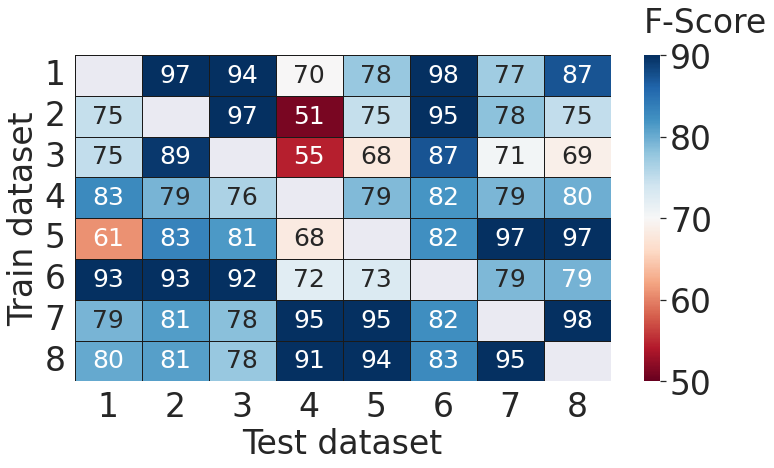

In [246]:
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4",]
# ticks_labels = []
# for i in range(len(ds_names)):
#     ticks_labels.append("{}".format(ds_names[i]))
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4" , "Tb #5", "Tb #6", "Tb #7", "Tb #8"]
ticks_labels = ["1", "2", "3", "4" , "5", "6", "7", "8"]

draw_heat_map(after_norm, ticks_labels, average_score)
plt.savefig('TR_9class_with_normalization_12features_{}.pdf'.format(average_score), bbox_inches='tight')


# 15 features - no normalize

42.65


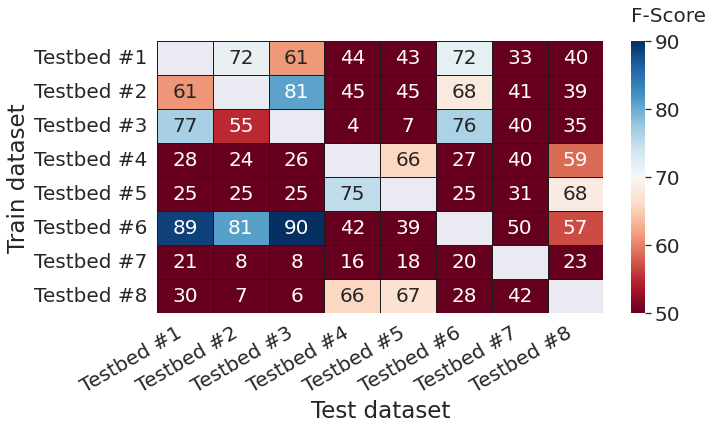

In [161]:
after_norm = transfer_learning_acc.copy()
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4",]
# ticks_labels = []
# for i in range(len(ds_names)):
#     ticks_labels.append("{}".format(ds_names[i]))
ticks_labels = ["Testbed #1", "Testbed #2", "Testbed #3", "Testbed #4" , "Testbed #5", "Testbed #6", "Testbed #7", "Testbed #8"]

draw_heat_map(after_norm, ticks_labels, average_score)

# 15 features - normalize some

# 23 features - no normalize

47.41


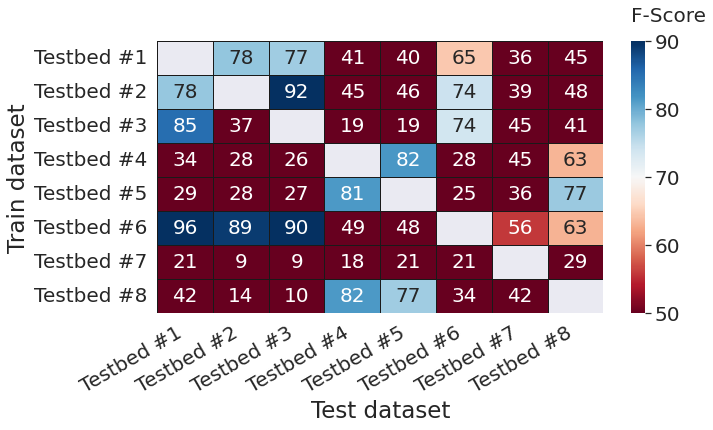

In [165]:
after_norm = transfer_learning_acc.copy()
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4",]
# ticks_labels = []
# for i in range(len(ds_names)):
#     ticks_labels.append("{}".format(ds_names[i]))
ticks_labels = ["Testbed #1", "Testbed #2", "Testbed #3", "Testbed #4" , "Testbed #5", "Testbed #6", "Testbed #7", "Testbed #8"]

draw_heat_map(after_norm, ticks_labels, average_score)

# 23 features - normalize some


62.53


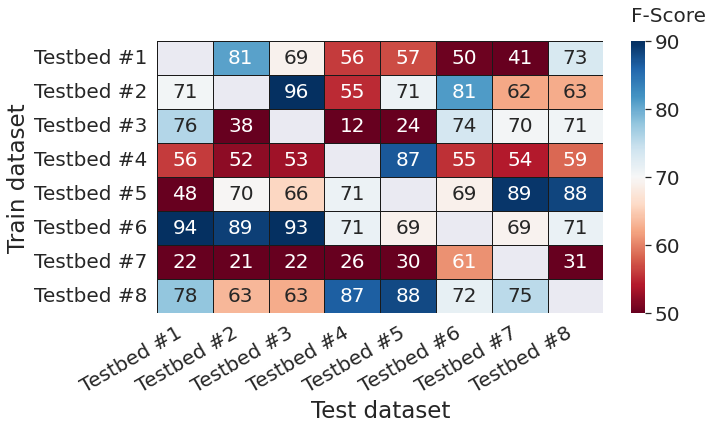

In [167]:
after_norm = transfer_learning_acc.copy()
# ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4",]
# ticks_labels = []
# for i in range(len(ds_names)):
#     ticks_labels.append("{}".format(ds_names[i]))
ticks_labels = ["Testbed #1", "Testbed #2", "Testbed #3", "Testbed #4" , "Testbed #5", "Testbed #6", "Testbed #7", "Testbed #8"]

draw_heat_map(after_norm, ticks_labels, average_score)

wisconsin_ssd_merged
utah_ssd_delay_merged ==> wisconsin_ssd_merged - 47.84
utah_ssd_merged
utah_ssd_delay_merged ==> utah_ssd_merged - 47.84
wisconsin_hdd_merged
utah_ssd_delay_merged ==> wisconsin_hdd_merged - 47.74
utah_ssd_delay_merged
utah_ssd_delay_merged ==> utah_ssd_delay_merged - 99.87




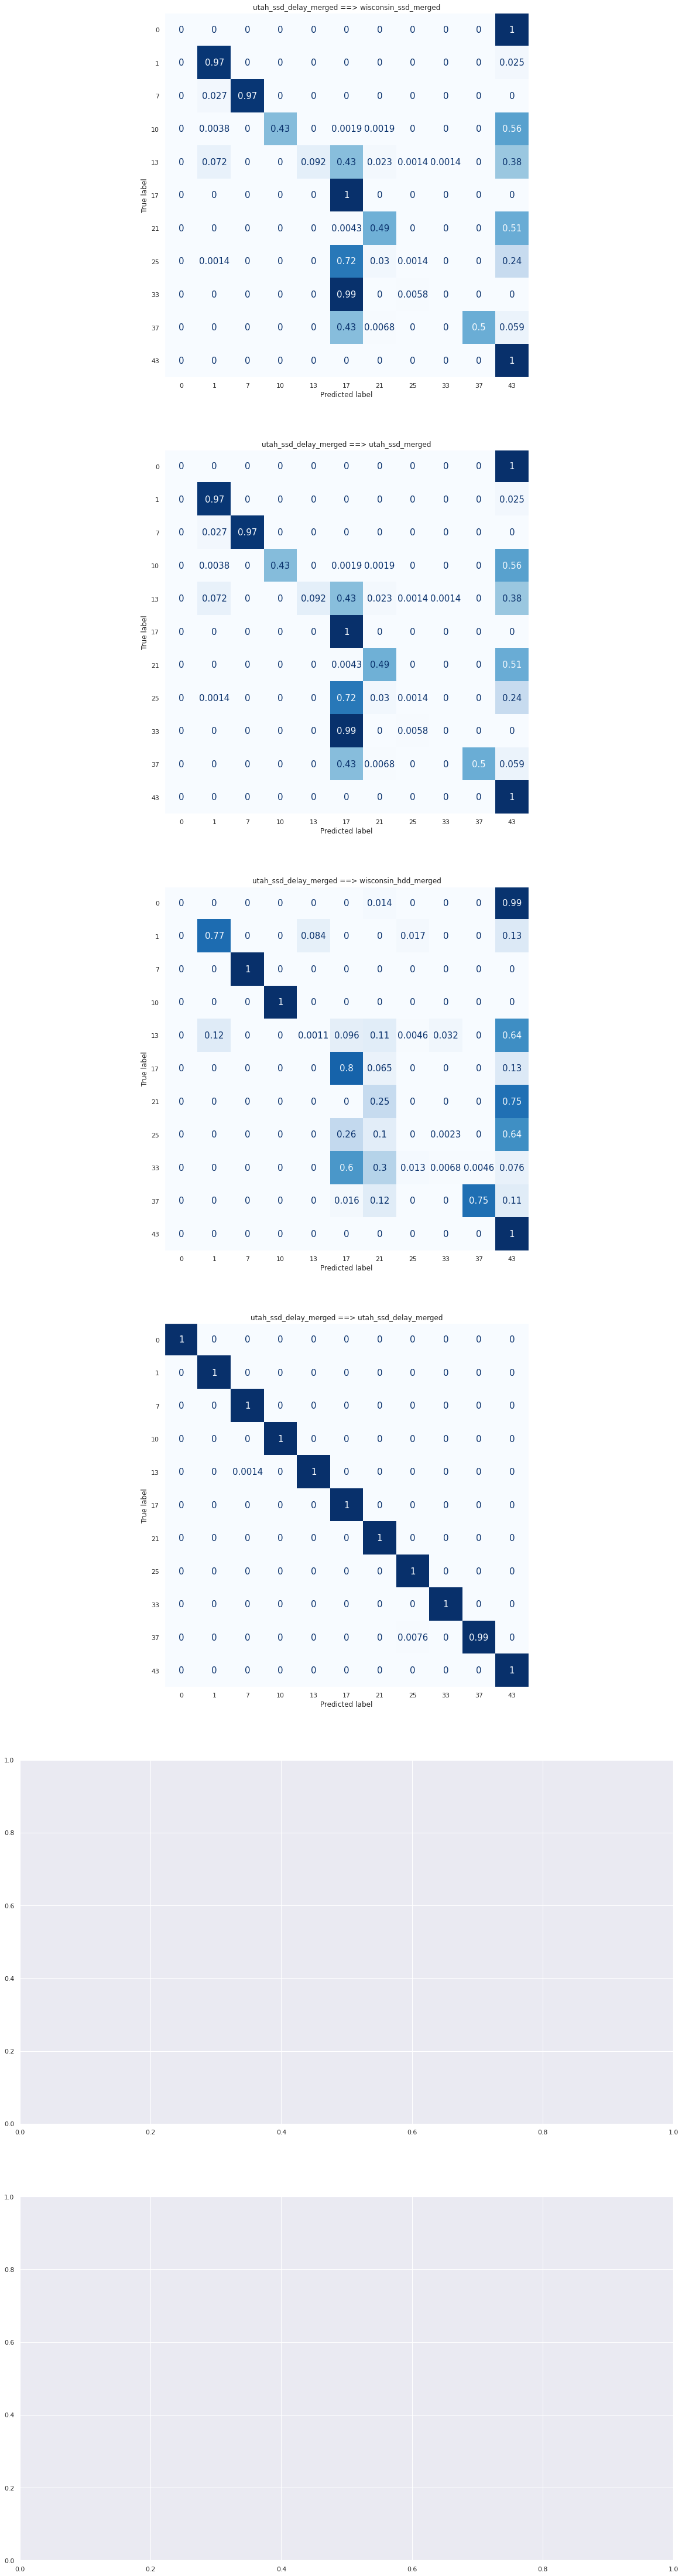

In [542]:
# creating confusion matrix for the chosen dataset and model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
transfer_learning_acc = []
fig, axes = plt.subplots(6,1, figsize=(20, 80))
plt.rcParams.update({'font.size': 15})
# feature_list = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_nic_send_bytes', 'sender_nic_receive_bytes', 'sender_remote_ost_read_bytes', 'receiver_avg_retransmission_timeout_value', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_nic_send_bytes', 'receiver_nic_receive_bytes', 'receiver_remote_ost_write_bytes']

# ds_names = ['wisconsin_ssd_merged', 'utah_ssd_merged', 'wisconsin_hdd_merged', 'utah_ssd_delay_merged']
labels_values = [4, 29 ] #[ 4, 43, 37]
key1 = "utah_ssd_delay_merged"
df = data[key1].copy()
df = remove_labels_in_df(df, labels_values)
df = normalize_df(df)
# df = grouped_to_5_cat(df,161)
# df = group_to_5_cate_version2(df,161)
y = df.label_value
X = df[feature_list]#.drop(columns="label_value")#[feature_list] #.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
# X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

clf = RandomForestClassifier(n_estimators=100)
# clf = tree.DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)
acc = np.array([])
for index, key2 in enumerate(data):
    print(key2)
    # if key1 == key2:
    #     continueK

    df_test = data[key2].copy()
    df_test = remove_labels_in_df(df_test, labels_values)
    df_test = normalize_df(df_test)
    # df_test = grouped_to_5_cat(df_test,161)
    # df_test = group_to_5_cate_version2(df_test,161)
    y_test = df_test.label_value
    X_test = df_test[feature_list]#.drop(columns="label_value")#[feature_list]#.drop(columns="label_value")#.drop(columns="label_value")

    y_pred = clf.predict(X_test)
    # y_pred_5cat = change_labels_5(y_pred, 21)
    # y_test_5cat = change_labels_5(y_test,
    #
    # 21)
    np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    print(f"{key1} ==> {key2} - {np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)}")
    acc = np.append(acc, np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2))

    axes[index].grid(False)
    axes[index].set_title(f"{key1} ==> {key2}")
    # axes[index].set_xlabel('True classes', fontsize=20)
    # axes[index].set_ylabel('Predicted classes', fontsize=20)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                                   labels=clf.classes_, normalize='true',
                                                   cmap=plt.cm.Blues, ax=axes[index], colorbar=False )
transfer_learning_acc.append(acc)
print("\n")
transfer_learning_acc = np.array(transfer_learning_acc)
# fig.savefig("confusion_matrix_tb4.jpg", dpi=100, bbox_inches='tight')

In [512]:
data.keys()

dict_keys(['wisconsin_ssd_merged', 'wisconsin_ssd_unmerged', 'utah_ssd_merged', 'utah_ssd_unmerged', 'wisconsin_hdd_merged', 'wisconsin_hdd_unmerged', 'utah_ssd_delay_merged', 'utah_ssd_delay_unmerged'])

In [517]:
transfer_learning_acc = []
rounds = 5
# 19, 28, 46, 73, 82, 100
remove_labels =  []# [4, 29]
def prepare_df(df):
    df = remove_labels_in_df(df, remove_labels)
    df = normalize_df(df)

    df = group_to_5_cate_version2(df,49)
    df = update_labels_xgboost_5cat(df)
    y = df.label_value
    X = df.drop(columns="label_value")[feature_list]#.drop(columns="label_value")#[feature_list] #.drop(columns="label_value")
    return X, y

ds_names = ['wisconsin_ssd_unmerged', 'utah_ssd_unmerged', 'wisconsin_hdd_unmerged', 'utah_ssd_delay_unmerged']

for key1 in ds_names:
    acc = np.array(np.zeros(len(ds_names)))
    for i in range(rounds):
        print("Round {}".format(i+1))
        df = data[key1].copy()
        X, y = prepare_df(df)
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
        # X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
        print(X_train.shape)
        clf = RandomForestClassifier(n_estimators=100)
        # clf = XGBClassifier()
        # clf = tree.DecisionTreeClassifier(max_depth=9)
        clf.fit(X_train, y_train)
        tmp_acc = np.array([])
        for key2 in ds_names:
            # if key1 == key2:
            #     continueK
            df_test = data[key2].copy()
            X_test, y_test = prepare_df(df_test)
            y_pred = clf.predict(X_test)
            # np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
            f_score = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(f"{key1} ==> {key2} - {f_score}")
            tmp_acc = np.append(tmp_acc, f_score)
        acc = np.add(acc, tmp_acc)
    acc = acc / rounds
    transfer_learning_acc.append(acc)
    print("\n")
transfer_learning_acc = np.array(transfer_learning_acc)

diag = np.diag_indices(len(ds_names))
average_score = (np.sum(transfer_learning_acc) - np.sum(transfer_learning_acc[diag]) ) / (transfer_learning_acc.size - len(ds_names))
average_score = np.round(average_score, 2)
print(average_score)

Round 1
(655, 25)
wisconsin_ssd_unmerged ==> wisconsin_ssd_unmerged - 99.77
wisconsin_ssd_unmerged ==> utah_ssd_unmerged - 99.77
wisconsin_ssd_unmerged ==> wisconsin_hdd_unmerged - 36.29
wisconsin_ssd_unmerged ==> utah_ssd_delay_unmerged - 41.6
Round 2
(705, 25)
wisconsin_ssd_unmerged ==> wisconsin_ssd_unmerged - 99.87
wisconsin_ssd_unmerged ==> utah_ssd_unmerged - 99.87
wisconsin_ssd_unmerged ==> wisconsin_hdd_unmerged - 30.96
wisconsin_ssd_unmerged ==> utah_ssd_delay_unmerged - 43.69
Round 3
(625, 25)
wisconsin_ssd_unmerged ==> wisconsin_ssd_unmerged - 99.83
wisconsin_ssd_unmerged ==> utah_ssd_unmerged - 99.83
wisconsin_ssd_unmerged ==> wisconsin_hdd_unmerged - 46.61
wisconsin_ssd_unmerged ==> utah_ssd_delay_unmerged - 42.54
Round 4
(600, 25)
wisconsin_ssd_unmerged ==> wisconsin_ssd_unmerged - 99.83
wisconsin_ssd_unmerged ==> utah_ssd_unmerged - 99.83
wisconsin_ssd_unmerged ==> wisconsin_hdd_unmerged - 33.39
wisconsin_ssd_unmerged ==> utah_ssd_delay_unmerged - 37.76
Round 5
(655, 25)

53.63


[Text(0, 0.5, 'wisconsin_ssd_unmerged'),
 Text(0, 1.5, 'utah_ssd_unmerged'),
 Text(0, 2.5, 'wisconsin_hdd_unmerged'),
 Text(0, 3.5, 'utah_ssd_delay_unmerged')]

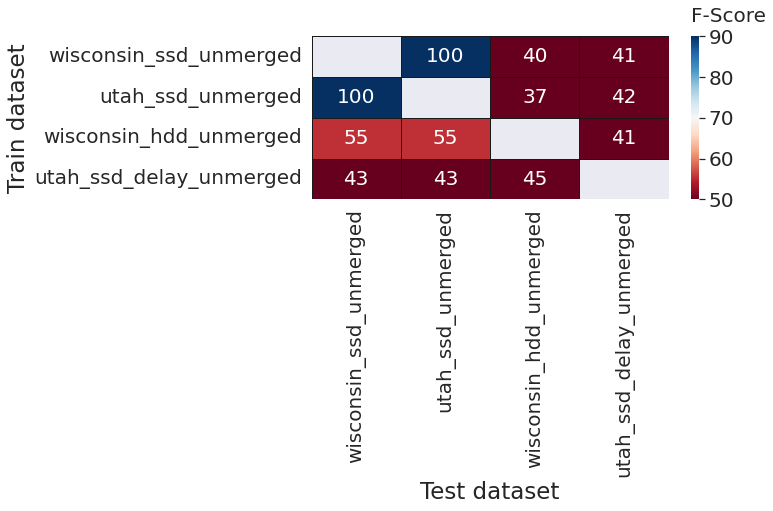

In [516]:
before_norm = transfer_learning_acc.copy()

sns.set(rc={'figure.figsize':(8,3), 'font.size': 20})
print(average_score)
mask = np.zeros(before_norm.shape)
np.fill_diagonal(before_norm, np.nan)
ax = sns.heatmap(before_norm, annot=True,  vmin=50, vmax=90,linewidths=.5,cmap="RdBu", linecolor='k', fmt='.0f', mask=mask)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title("F-Score", fontsize=20, y=1.05, loc="left")

ax.set_xlabel('Test dataset', fontsize= 23)
ax.set_ylabel('Train dataset', fontsize= 23)
ticks_labels = []
for i in range(len(ds_names)):
    # ticks_labels.append("Tb #{}".format(i+1))
    ticks_labels.append("{}".format(ds_names[i]))
ax.set_xticklabels(ticks_labels, rotation=90, fontsize= 20)
ax.set_yticklabels(ticks_labels, rotation=0, fontsize= 20)
# plt.savefig('TR_5cat_removedclasses_{}_score.pdf'.format(average_score), bbox_inches='tight')
# plt.savefig('TR_5cat_all21_{}_score.pdf'.format(average_score), bbox_inches='tight')

56.03


[Text(0, 0.5, 'Tb #1'),
 Text(0, 1.5, 'Tb #2'),
 Text(0, 2.5, 'Tb #3'),
 Text(0, 3.5, 'Tb #4')]

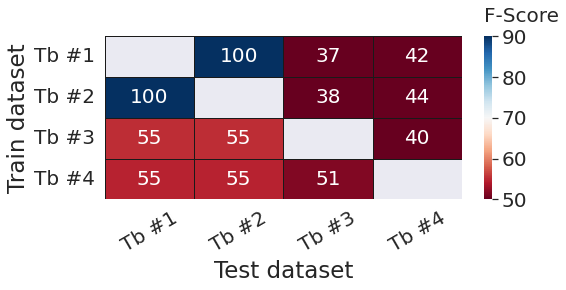

In [518]:
after_norm = transfer_learning_acc.copy()
sns.set(rc={'figure.figsize':(8,3), 'font.size': 20})
print(average_score)
mask = np.zeros(after_norm.shape)
np.fill_diagonal(after_norm, np.nan)

ax = sns.heatmap(after_norm, annot=True,  vmin=50, vmax=90,linewidths=.5,cmap="RdBu", linecolor='k', fmt='.0f',mask=mask)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title("F-Score", fontsize=20, y=1.05, loc="left")

ax.set_xlabel('Test dataset', fontsize= 23)
ax.set_ylabel('Train dataset', fontsize= 23)
ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4",]
ax.set_xticklabels(ticks_labels, rotation=30, fontsize= 20)
ax.set_yticklabels(ticks_labels, rotation=0, fontsize= 20)